<h2>3.3 &nbsp; O método de Runge-Kutta 4º ordem</h2>

&nbsp; Importando as bibliotecas NumPy e Matplotlib ao arquivo <b>atual</b>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Carregando o diretório <i><b>python/</b></i> que contém as funções escritas ao longo dos tópicos:

In [2]:
import sys 
sys.path.insert(0, '../python')

&nbsp; Importando a função sol_rk4 localizada em <i><b>Modelo-Populacional-Malthus/python/</b></i>

In [3]:
from sol_rk4 import sol_rk4

&nbsp; Uma vez importado o método de Euler modificado, basta declarar o passo de derivação <b>h</b>, a condição inicial <b>T0</b>, o tempo inicial <b>ti</b>, o tempo final <b>tf</b> e o intervalo de tempo <b>vt</b>:

In [4]:
#Passo de derivação
h = 0.001

#Condição inicial
P0 = 186488

#tempo inicial
ti = 10

#tempo final
tf = 21

#Intervalo de 10 à 21 anos com passo h
vt = np.arange(ti,tf,h)

In [5]:
%%time
P = sol_rk4(vt,P0)
print(P)
print('O vetor de temperaturas tem {} elementos'.format(P.shape[0]))

[186488.         186489.04433572 186490.0886773  ... 198333.52709967
 198334.63777054 198335.74844762]
O vetor de temperaturas tem 11000 elementos
CPU times: total: 578 ms
Wall time: 559 ms


Exibindo o gráfico <b>vt</b> $\times$ <b>P</b>

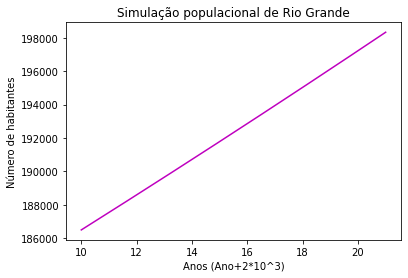

In [6]:
plt.plot(vt,P,'m',label='Runge-Kutta 4º ordem')
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

<h3>3.2.1 &nbsp; Estudo comparativo - Diferentes passos de derivação</h3>
&nbsp; Construímos um vetor <b>passos</b> contendo os passos de derivação. &nbsp;  Além disso, é importante para o estudo comparativo que as curvas possuam cores distintas. &nbsp; Também construímos um vetor de <b>cores</b>.

In [7]:
passos = np.array([5,3,1,0.001])
cores = np.array(['m','c','r','k','g','b'])
print(' |passos| = {} , |cores| = {}'.format(passos.shape[0],cores.shape[0]))

 |passos| = 4 , |cores| = 6


  Dessa forma, escrevemos um <i>loop</i> para percorrer os elementos de passos e assim gerar diferentes soluções através da função <b>sol_rk4</b>:

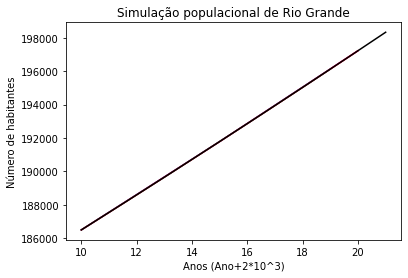

In [9]:
#Criando loop que percorre os elementos de passos
for passo in passos:
   
    #Criando vetor tempo
    vt = np.arange(ti,tf,passo)

    #Chamando a função sol_euler 
    P = sol_rk4(vt,P0)
    
    #Grafico da curva    
    plt.plot(vt,P,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))


#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()